## **Import các module**



In [31]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from typing import List, Optional, Union
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## **Các hàm plot hay dùng**

In [2]:
# --- 1. Functions for Categorical Data ---

def plot_count(
    df: pd.DataFrame,
    column: str,
    hue: Optional[str] = None,
    order: Optional[List[str]] = None,
    palette: str = 'viridis',
    ax: Optional[plt.Axes] = None,
    title: Optional[str] = None
) -> plt.Axes:
    """
    Vẽ biểu đồ cột đếm số lượng cho một cột phân loại.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu.
        column (str): Tên cột cần vẽ.
        hue (str, optional): Tên cột để phân nhóm màu. Mặc định là None.
        order (list, optional): Thứ tự hiển thị các nhãn trên trục x. Mặc định là None.
        palette (str, optional): Bảng màu của seaborn. Mặc định là 'viridis'.
        ax (plt.Axes, optional): Trục để vẽ biểu đồ. Mặc định là None (tạo mới).
        title (str, optional): Tiêu đề tùy chỉnh cho biểu đồ.

    Returns:
        plt.Axes: Đối tượng trục của biểu đồ.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    sns.countplot(data=df, x=column, hue=hue, order=order, palette=palette, ax=ax)

    if title:
        ax.set_title(title, fontsize=16, weight='bold')
    else:
        ax.set_title(f'Phân phối của {column}', fontsize=16, weight='bold')

    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Số lượng', fontsize=12)

    # Add percentage labels on top of bars
    total = len(df)
    if hue:
        # For grouped bar plots
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')
    else:
        # For simple bar plots
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return ax

In [3]:

# --- 2. Functions for Numerical Data ---

def plot_distribution(
    df: pd.DataFrame,
    column: str,
    hue: Optional[str] = None,
    kde: bool = True,
    bins: int = 'auto',
    palette: str = 'viridis',
    ax: Optional[plt.Axes] = None,
    title: Optional[str] = None
) -> plt.Axes:
    """
    Vẽ biểu đồ phân phối (histogram và KDE) cho một cột số.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu.
        column (str): Tên cột cần vẽ.
        hue (str, optional): Tên cột để phân nhóm màu. Mặc định là None.
        kde (bool, optional): Có vẽ đường KDE (Kernel Density Estimate) hay không. Mặc định là True.
        bins (int or str, optional): Số lượng bins của histogram. Mặc định là 'auto'.
        palette (str, optional): Bảng màu của seaborn. Mặc định là 'viridis'.
        ax (plt.Axes, optional): Trục để vẽ biểu đồ. Mặc định là None (tạo mới).
        title (str, optional): Tiêu đề tùy chỉnh cho biểu đồ.

    Returns:
        plt.Axes: Đối tượng trục của biểu đồ.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    sns.histplot(data=df, x=column, hue=hue, kde=kde, bins=bins, palette=palette, ax=ax)

    if title:
        ax.set_title(title, fontsize=16, weight='bold')
    else:
        ax.set_title(f'Phân phối của {column}', fontsize=16, weight='bold')

    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Tần suất', fontsize=12)
    plt.tight_layout()
    return ax


def plot_box(
    df: pd.DataFrame,
    x: Optional[str] = None,
    y: str = '',
    hue: Optional[str] = None,
    palette: str = 'viridis',
    ax: Optional[plt.Axes] = None,
    title: Optional[str] = None
) -> plt.Axes:
    """
    Vẽ biểu đồ hộp (box plot) để so sánh phân phối.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu.
        x (str, optional): Tên cột phân loại trên trục x. Mặc định là None.
        y (str): Tên cột số trên trục y.
        hue (str, optional): Tên cột để phân nhóm màu. Mặc định là None.
        palette (str, optional): Bảng màu của seaborn. Mặc định là 'viridis'.
        ax (plt.Axes, optional): Trục để vẽ biểu đồ. Mặc định là None (tạo mới).
        title (str, optional): Tiêu đề tùy chỉnh cho biểu đồ.

    Returns:
        plt.Axes: Đối tượng trục của biểu đồ.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    sns.boxplot(data=df, x=x, y=y, hue=hue, palette=palette, ax=ax)

    if title:
        ax.set_title(title, fontsize=16, weight='bold')
    else:
        title_y = f'Phân phối của {y}'
        if x:
            ax.set_title(f'{title_y} theo {x}', fontsize=16, weight='bold')
        else:
            ax.set_title(title_y, fontsize=16, weight='bold')

    ax.set_xlabel(x, fontsize=12)
    ax.set_ylabel(y, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return ax


In [ ]:
# --- 3. Functions for Bivariate/Multivariate Analysis ---
def plot_stacked_bar(
    df: pd.DataFrame,
    x: str,
    hue: str,
    normalize: bool = True,
    palette: str = 'viridis',
    ax: Optional[plt.Axes] = None,
    title: Optional[str] = None
) -> plt.Axes:
    """
    Vẽ biểu đồ cột xếp chồng (stacked bar chart), thường dùng để xem tỷ lệ phần trăm.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu.
        x (str): Tên cột phân loại trên trục x.
        hue (str): Tên cột phân loại để xếp chồng.
        normalize (bool, optional): Nếu True, biểu đồ sẽ hiển thị tỷ lệ phần trăm (tổng = 100%). Mặc định là True.
        palette (str, optional): Bảng màu của seaborn. Mặc định là 'viridis'.
        ax (plt.Axes, optional): Trục để vẽ biểu đồ. Mặc định là None (tạo mới).
        title (str, optional): Tiêu đề tùy chỉnh cho biểu đồ.

    Returns:
        plt.Axes: Đối tượng trục của biểu đồ.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Tạo bảng tổng hợp (crosstab)
    counts = pd.crosstab(df[x], df[hue])

    if normalize:
        # Chuyển đổi thành tỷ lệ phần trăm
        counts = counts.div(counts.sum(axis=1), axis=0) * 100

    # Vẽ biểu đồ cột xếp chồng
    counts.plot(kind='bar', stacked=True, colormap=palette, ax=ax)

    if title:
        ax.set_title(title, fontsize=16, weight='bold')
    else:
        ax.set_title(f'Tỷ lệ {hue} theo {x}', fontsize=16, weight='bold')

    ax.set_xlabel(x, fontsize=12)
    if normalize:
        ax.set_ylabel('Tỷ lệ (%)', fontsize=12)
    else:
        ax.set_ylabel('Số lượng', fontsize=12)

    ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return ax



In [5]:

# --- 4. Function for Multiple Plots (Faceting) ---

def plot_by_category(
    df: pd.DataFrame,
    col: str,
    plot_func: callable,
    plot_kwargs: dict,
    wrap_cols: int = 3,
    figsize: tuple = (18, 12)
) -> plt.Figure:
    """
    Vẽ một loạt biểu đồ con, mỗi biểu đồ cho một giá trị duy nhất của một cột phân loại.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu.
        col (str): Tên cột để phân nhóm và tạo các biểu đồ con.
        plot_func (callable): Hàm vẽ biểu đồ (ví dụ: sns.histplot, sns.boxplot).
        plot_kwargs (dict): Từ điển chứa các đối số cho hàm vẽ.
        wrap_cols (int, optional): Số cột để sắp xếp các biểu đồ con. Mặc định là 3.
        figsize (tuple, optional): Kích thước tổng thể của biểu đồ. Mặc định là (18, 12).

    Returns:
        plt.Figure: Đối tượng hình vẽ.
    """
    categories = df[col].unique()
    n_categories = len(categories)
    n_rows = (n_categories + wrap_cols - 1) // wrap_cols

    fig, axes = plt.subplots(n_rows, wrap_cols, figsize=figsize)
    axes = axes.flatten() # Làm phẳng mảng trục để dễ lặp

    for i, category in enumerate(categories):
        ax = axes[i]
        data_subset = df[df[col] == category]

        # Gọi hàm vẽ với dữ liệu con và trục hiện tại
        plot_func(data=data_subset, ax=ax, **plot_kwargs)
        ax.set_title(f'{col}: {category}', weight='bold')

    # Ẩn các trục thừa
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    return fig


## **Đọc file**

In [6]:
# Đoạn này có thể sử dụng kagglehub, nhưng cá nhân tôi thích với những dữ liệu không lớn thì đẩy lên github và dùng
df = pd.read_csv("https://raw.githubusercontent.com/thethien8a/Churn-Prediction-Telco/refs/heads/main/data/raw_data/Telco.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **EDA + Tiền xử lý dữ liệu cơ bản trên toàn bộ tập dữ liệu**

### **Giải thích bộ dữ liệu**
Bộ dữ liệu **Telco Customer Churn** từ IBM chứa thông tin chi tiết về khách hàng của một công ty viễn thông giả định. Mục tiêu chính là dự đoán khách hàng nào có khả năng sẽ rời bỏ dịch vụ (churn).

### **Ý nghĩa các cột dữ liệu**

Các cột được chia thành 4 nhóm chính: **Thông tin khách hàng**, **Dịch vụ đã đăng ký**, **Thông tin tài khoản**, và **Nhãn mục tiêu**.

#### 1. Thông tin khách hàng (Customer Information)

| Tên cột | Ý nghĩa | Kiểu dữ liệu | Ví dụ |
| :--- | :--- | :--- | :--- |
| `customerID` | Mã định danh duy nhất của mỗi khách hàng. | Chuỗi (String) | "7590-VHVEG" |
| `gender` | Giới tính của khách hàng. | Chuỗi (String) | "Female", "Male" |
| `SeniorCitizen` | Khách hàng có phải là người cao tuổi (65 tuổi trở lên) hay không. | Số nguyên (Integer) | 0 (Không), 1 (Có) |
| `Partner` | Khách hàng có có bạn đời hoặc người đồng hành không. | Chuỗi (String) | "Yes", "No" |
| `Dependents` | Khách hàng có người phụ thuộc (ví dụ: con cái) không. | Chuỗi (String) | "Yes", "No" |

#### 2. Dịch vụ đã đăng ký (Services Signed Up For)

| Tên cột | Ý nghĩa | Kiểu dữ liệu | Các giá trị |
| :--- | :--- | :--- | :--- |
| `PhoneService` | Khách hàng có đăng ký dịch vụ điện thoại không. | Chuỗi (String) | "Yes", "No" |
| `MultipleLines` | Khách hàng có đăng ký nhiều đường dây điện thoại không. | Chuỗi (String) | "Yes", "No", "No phone service" |
| `InternetService` | Nhà cung cấp dịch vụ Internet của khách hàng. | Chuỗi (String) | "DSL", "Fiber optic", "No" |
| `OnlineSecurity` | Khách hàng có đăng ký dịch vụ bảo mật trực tuyến không. | Chuỗi (String) | "Yes", "No", "No internet service" |
| `OnlineBackup` | Khách hàng có đăng ký dịch vụ sao lưu trực tuyến không. | Chuỗi (String) | "Yes", "No", "No internet service" |
| `DeviceProtection` | Khách hàng có đăng ký dịch vụ bảo vệ thiết bị không. | Chuỗi (String) | "Yes", "No", "No internet service" |
| `TechSupport` | Khách hàng có đăng ký dịch vụ hỗ trợ kỹ thuật không. | Chuỗi (String) | "Yes", "No", "No internet service" |
| `StreamingTV` | Khách hàng có đăng ký dịch vụ truyền hình trực tuyến không. | Chuỗi (String) | "Yes", "No", "No internet service" |
| `StreamingMovies` | Khách hàng có đăng ký dịch vụ xem phim trực tuyến không. | Chuỗi (String) | "Yes", "No", "No internet service" |

#### 3. Thông tin tài khoản (Account Information)

| Tên cột | Ý nghĩa | Kiểu dữ liệu | Ví dụ |
| :--- | :--- | :--- | :--- |
| `tenure` | Số tháng khách hàng đã gắn bó với công ty. | Số nguyên (Integer) | 1, 34, 2 |
| `Contract` | Loại hợp đồng của khách hàng. | Chuỗi (String) | "Month-to-month", "One year", "Two year" |
| `PaperlessBilling` | Khách hàng có sử dụng hóa đơn điện tử không. | Chuỗi (String) | "Yes", "No" |
| `PaymentMethod` | Phương thức thanh toán của khách hàng. | Chuỗi (String) | "Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)" |
| `MonthlyCharges` | Số tiền khách hàng phải trả hàng tháng. | Số thực (Float) | 29.85, 56.95, 53.85 |
| `TotalCharges` | Tổng số tiền khách hàng đã thanh toán đến nay. | Số thực (Float) | 29.85, 1889.50, 108.15 |

#### 4. Nhãn mục tiêu (Target Label)

| Tên cột | Ý nghĩa | Kiểu dữ liệu | Các giá trị |
| :--- | :--- | :--- | :--- |
| `Churn` | Khách hàng có rời bỏ công ty trong tháng cuối cùng hay không. | Chuỗi (String) | "Yes", "No" |

In [7]:
# Số hàng và cột của bộ dữ liệu
df.shape

(7043, 21)

7043 hàng, 21 cột. Tập dữ liệu tương đối nhỏ

In [8]:
# Xem 1 vài thông tin về dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Mặc dù ở đây non-null là 7043 tuy nhiên chưa thể khẳng định rằng không có cột nào bị thiếu vì kiểu dữ liệu object ở đây xuất hiện nhiều. Giá trị null có thể là khoảng trắng ("")

In [9]:
# Xem mô tả các giá trị số
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Xem qua thì ta thấy:
- Khách hàng không phải cao tuổi chiếm nhiều hơn là cao tuổi (do mean gần với 0)
- Khách hàng gắn bó lâu nhất tính đến thời điểm hiện tại là 72 tháng (tương đương 6 năm). Chứng tỏ công ty này đã thành lập được khoảng >= 6 năm.
- Trung bình số tiền mỗi khách hàng đóng mỗi tháng là 64,76 (đơn vị có thể là $)

In [10]:
# Kiểm tra xem có customerID nào bị lặp lại không
print("Số CustomerID bị lặp lại:",df["customerID"].duplicated().sum())


Số CustomerID bị lặp lại: 0


### Xem tỷ lệ các giá trị churn:

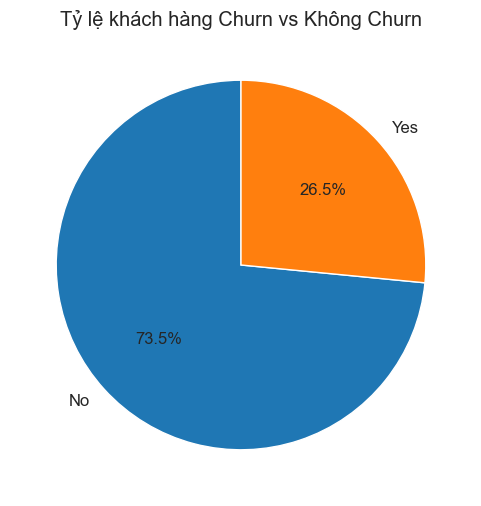

In [11]:
# Tính tỷ lệ phần trăm
churn_counts = df["Churn"].value_counts(normalize=True)

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    # colors=['lightgreen', 'lightcoral']
)
plt.title("Tỷ lệ khách hàng Churn vs Không Churn")
plt.show()

-> Không thể dùng accuracy do tập dữ liệu này mất cân bằng, độ chính xác sẽ rất cao, nói đơn giản:

Giả sử rằng khách hàng nào bạn cũng đoán là "No Churn" thì Accuracy của bạn là 73,6%. Nghe có vẻ lớn nhưng thực chất bạn chả đoán được ai là "Churn" cả.

Trong trường hợp này chúng ta sẽ sử dụng các chỉ số khác như: Precision, Recall, F1-Score hay AUC-ROC

### Tiền xử lý cơ bản trên toàn bộ tập dữ liệu:

In [12]:
# Đổi tên "Churn" thành "IsChurn" và giá trị "Yes"/"No" thành 1/0
df["IsChurn"] = df["Churn"].map({"Yes": 1, "No": 0})
df.drop(columns=["Churn"], inplace=True)

In [13]:
# Xóa customerID bị lặp (nếu có)
df.drop_duplicates(subset="customerID", inplace=True)

In [14]:
# Loại bỏ cột "CustomerID" vì nó chỉ là khóa xác định cho từng thực thể, không mang ý nghĩa kinh doanh
df.drop(columns=["customerID"], inplace=True)

In [15]:
# Loại bỏ các giá trị bị trùng lặp (nếu có)
df.drop_duplicates(inplace=True)

In [16]:
print("Số hàng và cột còn lại:",df.shape)

Số hàng và cột còn lại: (7021, 20)


Ta nhận thấy sau khi tiền xử lý đơn giản thì số hàng giảm đi từ 7043 xuống còn 7021

In [17]:
# Làm sạch các khoảng trắng thừa ở các biến chữ nếu có
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [18]:
object_columns = df.select_dtypes("object").columns

### Tiền xử lý null ở cột chữ (nếu có thể mà không gây ra data leakage):

In [19]:
# Ta check các giá trị NULL
print(f"{'Column':<25} {'Empty Count':>12}")
print("-" * 38)
for col in object_columns:
    empty_count = len(df[df[col] == ''])
    print(f"{col:<25} {empty_count:>12,}")

Column                     Empty Count
--------------------------------------
gender                               0
Partner                              0
Dependents                           0
PhoneService                         0
MultipleLines                        0
InternetService                      0
OnlineSecurity                       0
OnlineBackup                         0
DeviceProtection                     0
TechSupport                          0
StreamingTV                          0
StreamingMovies                      0
Contract                             0
PaperlessBilling                     0
PaymentMethod                        0
TotalCharges                        11


Ta thấy tồn tại cột "TotalCharges" có chứa 11 giá trị trống. Ta cùng tìm hiểu cột này trước tiên

In [20]:
print(df["TotalCharges"].head())

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object


Nhẽ ra cột này phải là kiểu giá trị float nhưng có lẽ vài cột trống nên khiến nó phải là kiểu dữ liệu object

In [21]:
# Ta quan sát lại 2 cột số "tenture" và "MonthlyCharges", kết hợp và 1 cột ta tạo tên: ProductTenureMonthcharge là tích của 2 cột "ten ..." và "Monthly ..."
temp = df[["tenure","MonthlyCharges", "TotalCharges"]].copy()
temp["ProductTenureMonthcharge"] = temp["tenure"] * temp["MonthlyCharges"]

In [22]:
temp.head(10)

,tenure,MonthlyCharges,TotalCharges,ProductTenureMonthcharge
0,1,29.85,29.85,29.85
1,34,56.95,1889.5,1936.30
2,2,53.85,108.15,107.70
3,45,42.30,1840.75,1903.50
4,2,70.70,151.65,141.40
5,8,99.65,820.5,797.20
6,22,89.10,1949.4,1960.20
7,10,29.75,301.9,297.50
8,28,104.80,3046.05,2934.40
9,62,56.15,3487.95,3481.30


Để ý thấy rằng 2 cột TotalCharges và ProductTenureMonthcharge có giá trị tương đối gần giống nhau.  

**Tôi đặt giả thuyết** ở đây đó chính là: **TotalCharges = tenure * MonthlyCharges * Something** với **Something** là tỷ lệ phần trăm hoặc gì đó thay đổi theo thời gian (kiểu khách hàng gắn bó càng lâu thì số tiền hàng tháng sẽ được giảm chẳng hạn)

In [23]:
# Vốn dĩ tôi có giả định trên bởi vì:
# Ta quan sát với tenure bằng 1, sẽ thấy TotalCharges và ProductTenureMonthcharge là bằng nhau
temp[temp["tenure"] == 1].head(10)

,tenure,MonthlyCharges,TotalCharges,ProductTenureMonthcharge
0,1,29.85,29.85,29.85
20,1,39.65,39.65,39.65
22,1,20.15,20.15,20.15
27,1,30.20,30.2,30.20
33,1,20.20,20.2,20.20
34,1,45.25,45.25,45.25
70,1,49.05,49.05,49.05
80,1,79.35,79.35,79.35
91,1,74.70,74.7,74.70
100,1,20.20,20.2,20.20


In [24]:
# Nhưng khi tenure > 1, kết quả lúc này sẽ khác
temp[temp["tenure"] > 1].head(10)

,tenure,MonthlyCharges,TotalCharges,ProductTenureMonthcharge
1,34,56.95,1889.5,1936.30
2,2,53.85,108.15,107.70
3,45,42.30,1840.75,1903.50
4,2,70.70,151.65,141.40
5,8,99.65,820.5,797.20
6,22,89.10,1949.4,1960.20
7,10,29.75,301.9,297.50
8,28,104.80,3046.05,2934.40
9,62,56.15,3487.95,3481.30
10,13,49.95,587.45,649.35


Những điều ở trên phần nào đã củng cố giả thuyết của tôi   
Do đó, tôi sẽ dùng ProductTenureMonthcharge để xấp xỉ cho TotalCharges với những giá trị thiếu

In [25]:
temp["TotalCharges"] = temp["TotalCharges"].replace("", np.nan).astype(float)
temp["TotalCharges"] = temp["TotalCharges"].fillna(temp["ProductTenureMonthcharge"])
df["TotalCharges"] = temp["TotalCharges"]

## **EDA + Tiền xử lý dữ liệu trên tập train**

### Chia train, test cho df

In [26]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df["IsChurn"])

### EDA

In [29]:
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,IsChurn
2629,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),70.70,140.70,1
2650,Female,0,No,No,15,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),84.35,1302.65,0
1418,Male,0,Yes,Yes,67,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.55,6373.10,0
5774,Male,0,No,No,5,Yes,No,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),65.60,339.90,0
2425,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.30,511.25,0


Để hỗ trợ cho việc EDA, tôi sẽ biến đổi các cột chữ tạm thời thành biến số để hỗ trợ cho việc xác định xem đâu là những biến có quan hệ tuyến tính mạnh đối với churn. Vốn dĩ tôi chọn việc Label Encode vì các biến chữ đa phần là low cardinality nên việc dùng label encode là hợp lý.

In [32]:
label = LabelEncoder()
categorical_cols = df_train.select_dtypes(include=['object']).columns
df_train_encoded = df_train.copy()
for col in categorical_cols:
    if col != "customerID":
        df_train_encoded[col] = label.fit_transform(df_train[col].astype(str))

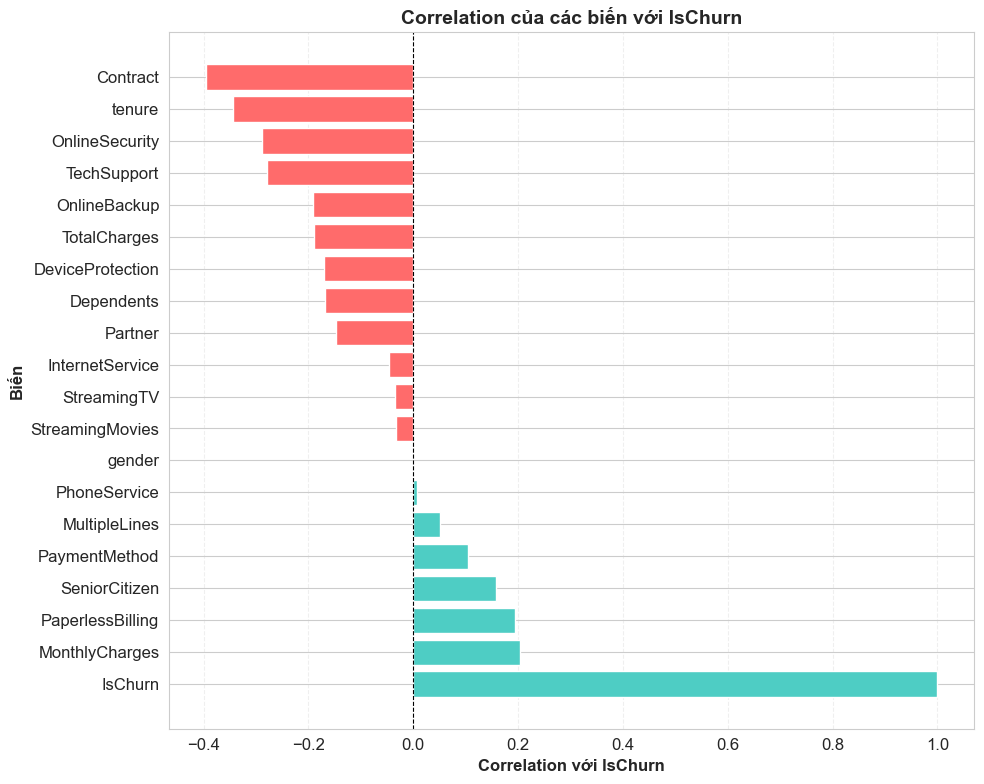

In [37]:
# Tính correlation của các biến đầu vào với target IsChurn
correlation = df_train_encoded.corr()["IsChurn"].sort_values(ascending=False)

# Plot correlation với màu sắc đẹp
plt.figure(figsize=(10, 8))
colors = ['#FF6B6B' if x < 0 else '#4ECDC4' for x in correlation.values]
bars = plt.barh(range(len(correlation)), correlation.values, color=colors)
plt.yticks(range(len(correlation)), correlation.index)
plt.xlabel('Correlation với IsChurn', fontsize=12, fontweight='bold')
plt.ylabel('Biến', fontsize=12, fontweight='bold')
plt.title('Correlation của các biến với IsChurn', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [42]:
# Lấy ra những cột có có corr >= 0.2
high_corr_features = correlation[correlation.abs() >= 0.2].sort_values(ascending=False).index.tolist()
high_corr_features.remove('IsChurn')  # Loại bỏ target variable
print("Các biến có correlation > 0.2 với IsChurn:")
print(high_corr_features)

Các biến có correlation > 0.2 với IsChurn:
['MonthlyCharges', 'TechSupport', 'OnlineSecurity', 'tenure', 'Contract']


Ta sẽ tập trung vào những cột: 'MonthlyCharges', 'TechSupport', 'OnlineSecurity', 'tenure', 'Contract' trước

#### Contract

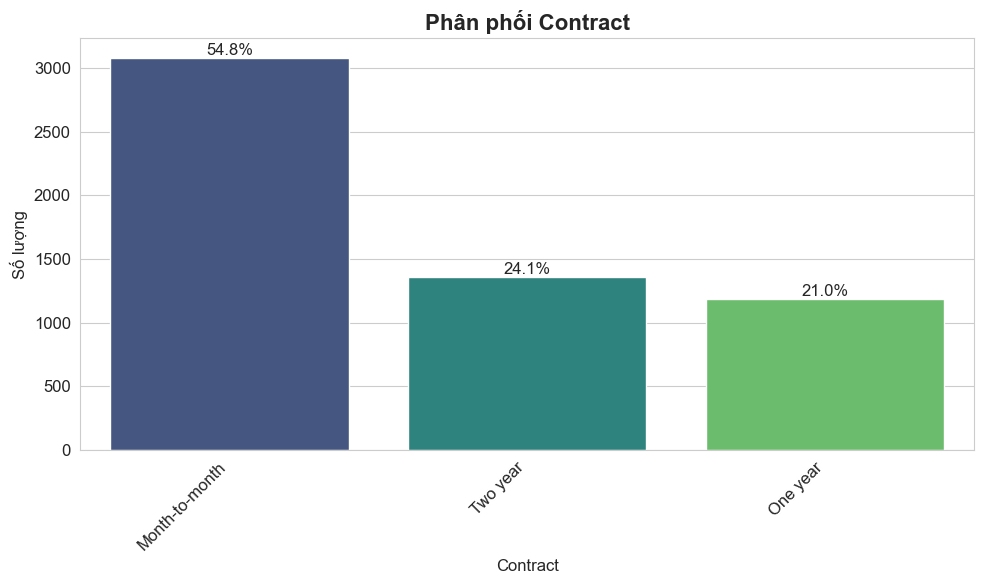

In [28]:
plot_count(df_train, column="Contract", title="Phân phối Contract");

Đa phần khách hàng chúng ta là Month-to-month

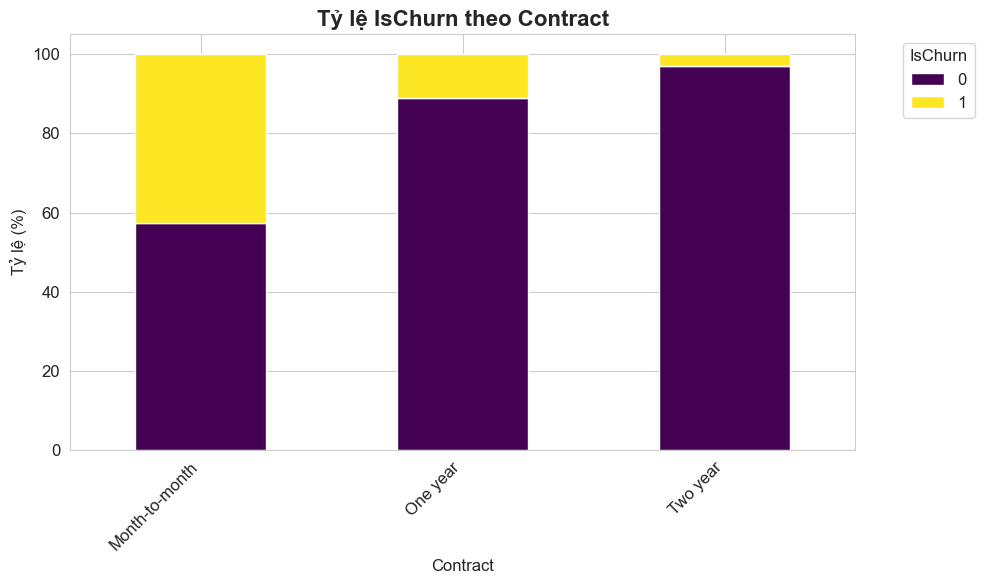

In [45]:
plot_stacked_bar(df_train, x="Contract", hue="IsChurn");

**Insight**: Cột Month-to-month có tỷ lệ khách hàng rời đi là cao nhất. Với hợp đồng càng dài hạn thì tỷ lệ Churn càng thấp đi. Điều này không phải vấn đề do số lượng mẫu thấp ở one year và two year bởi tỷ lệ mẫu của one year chiếm gần 1/4 (giống với tỷ lệ mẫu của two year)

**Hàm ý hành động**: Thiết kế chiến dịch upsell sang gói dài hạn, đồng thời phân tích lý do khách chọn Month-to-month (giá, ràng buộc, loại dịch vụ kèm theo) để giảm rào cản.

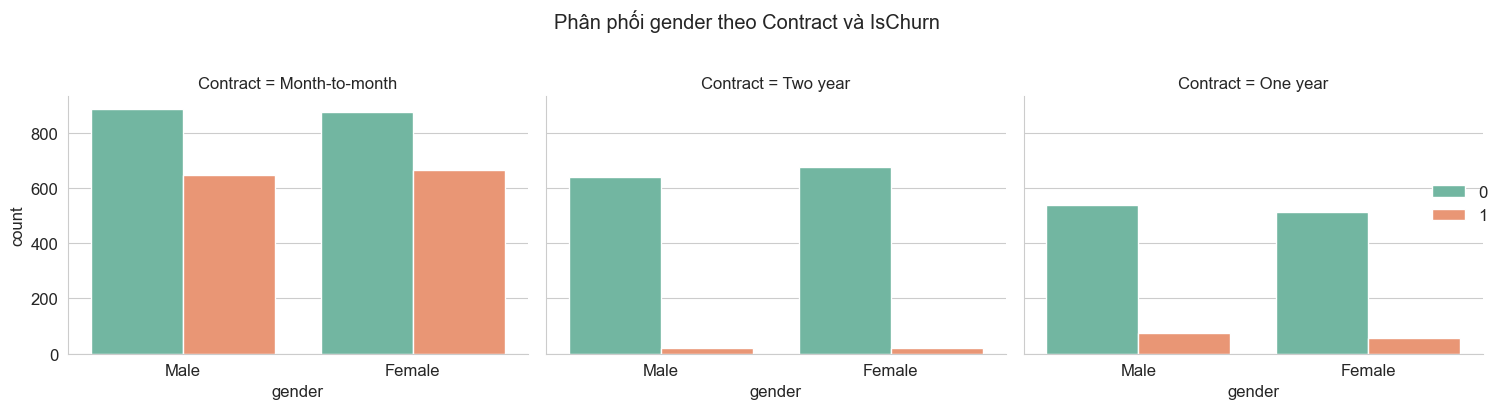

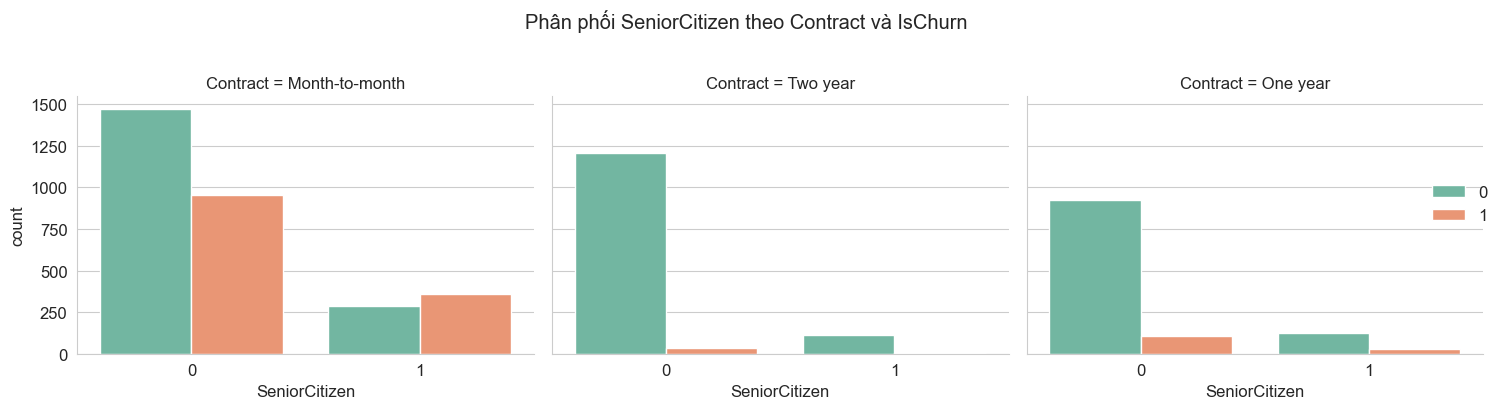

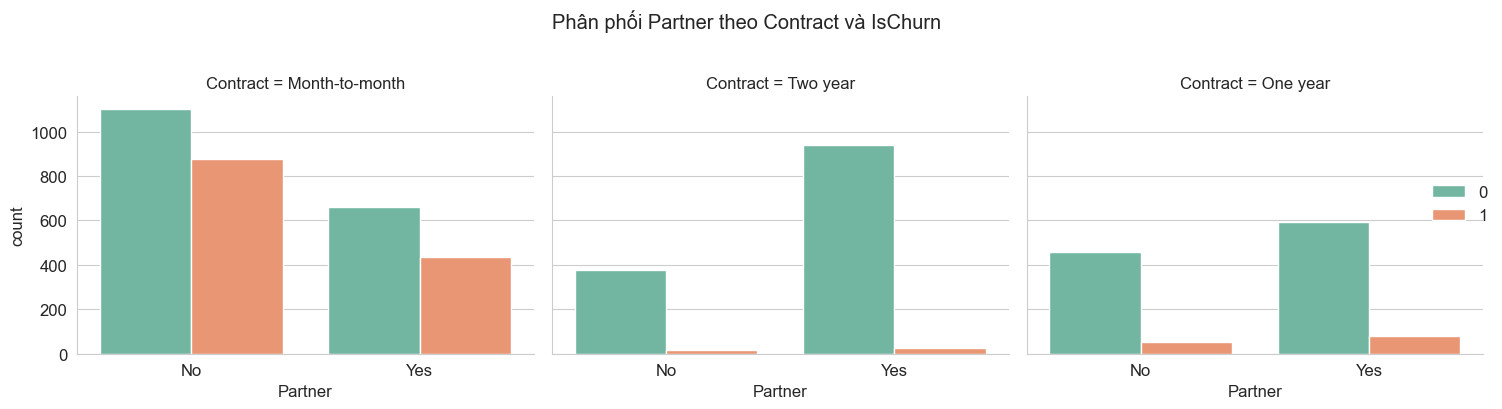

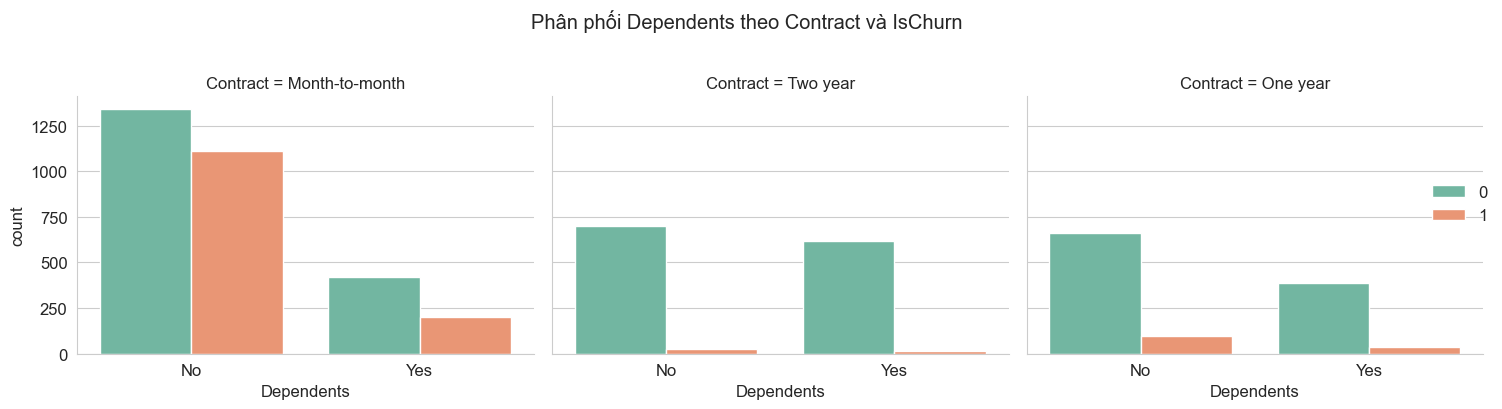

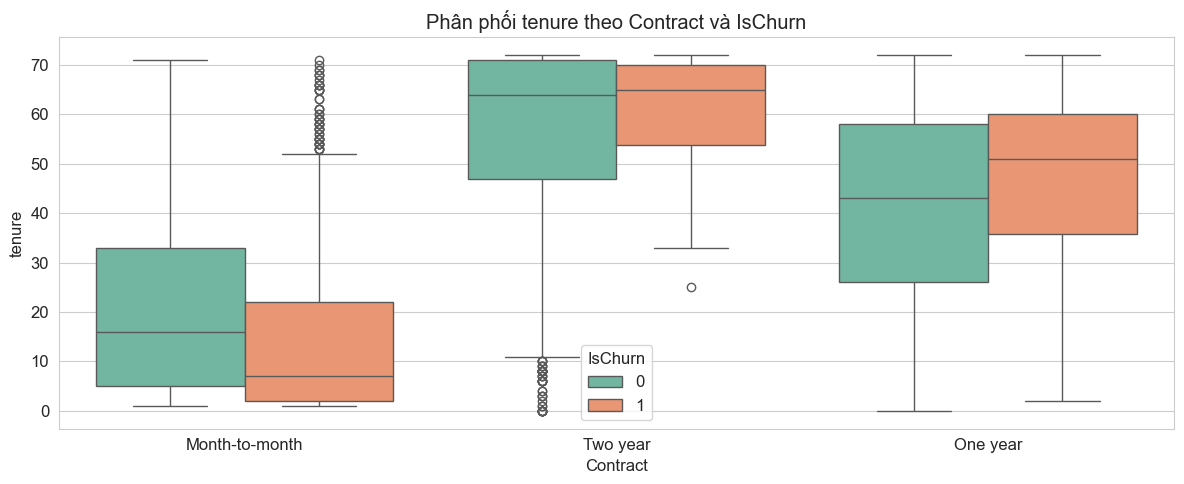

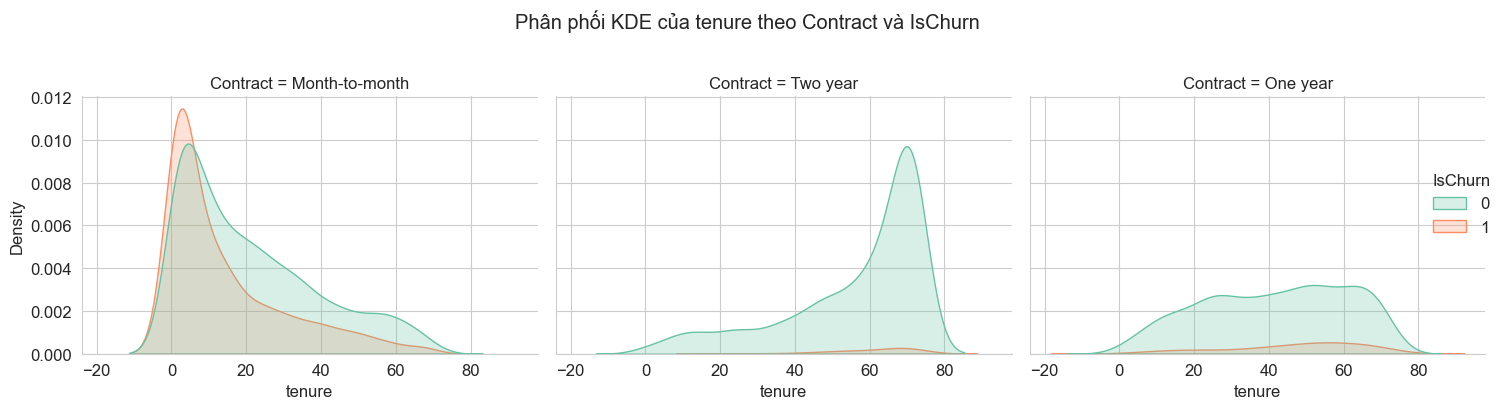

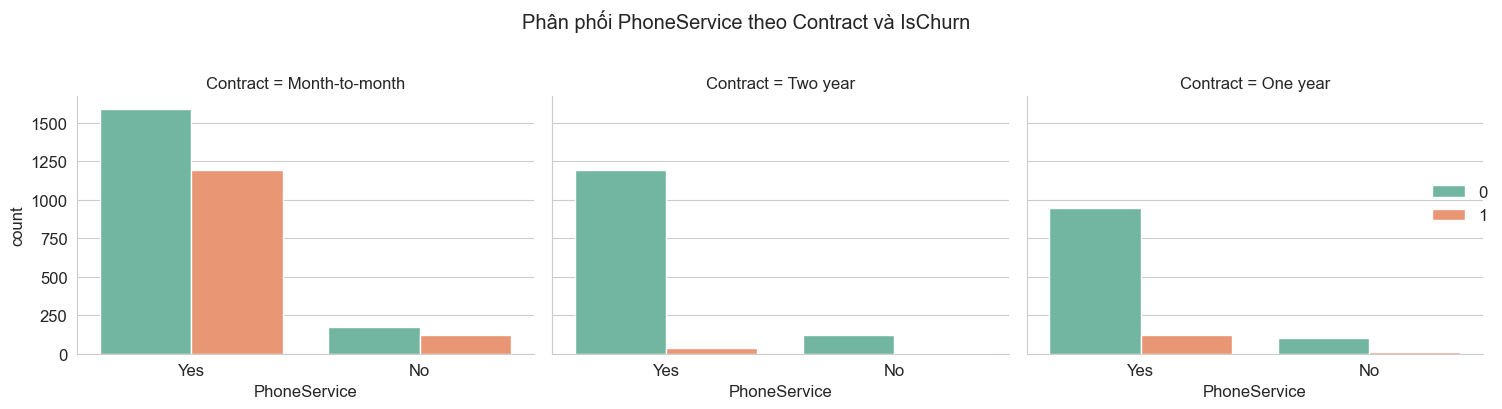

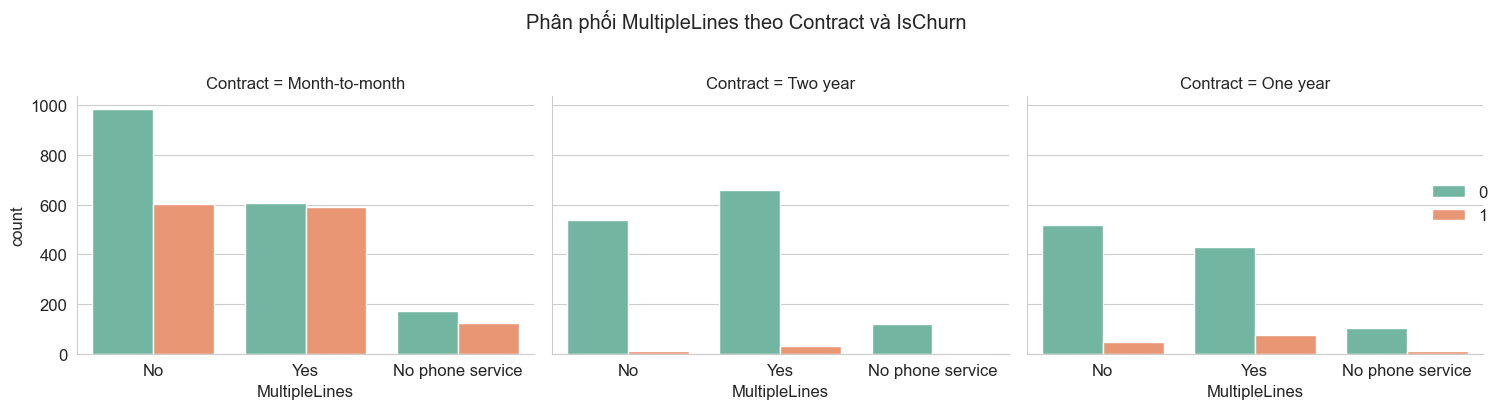

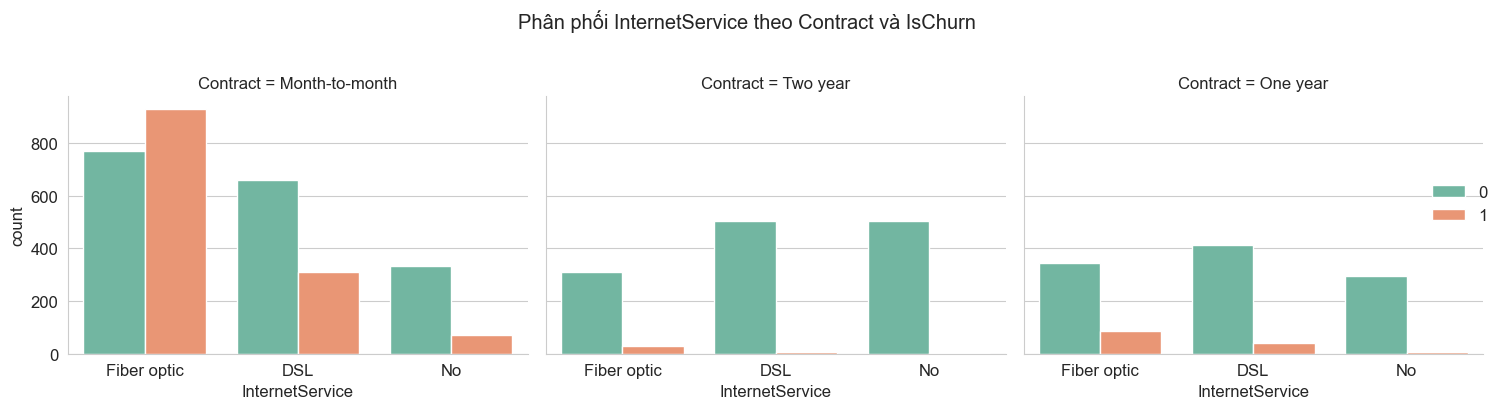

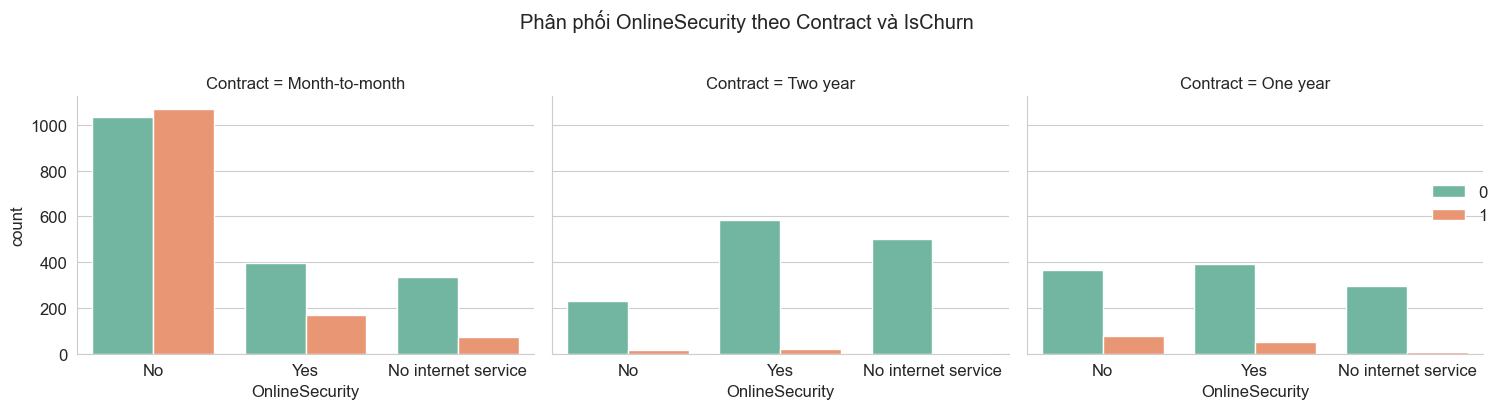

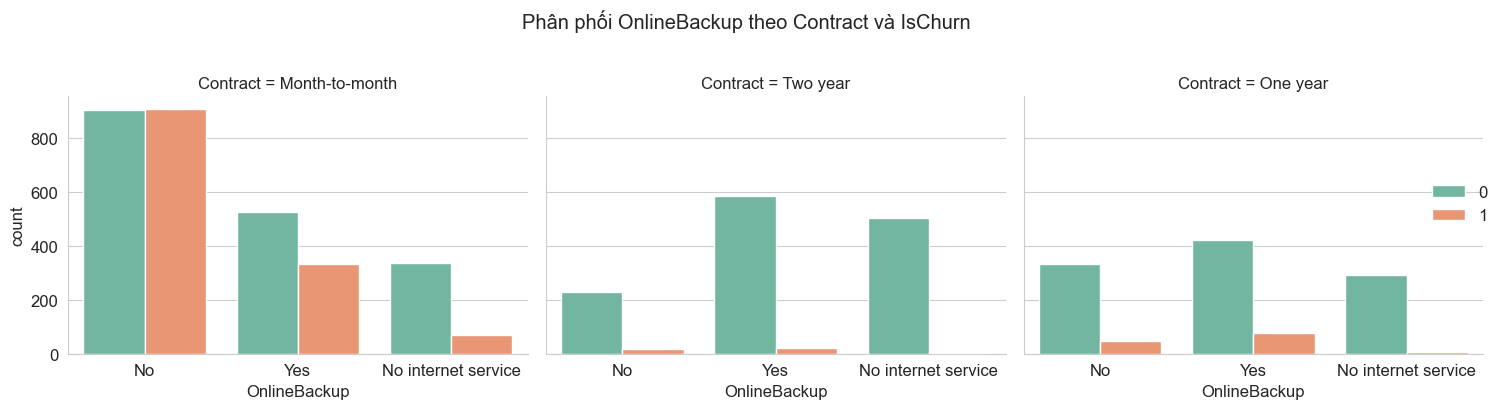

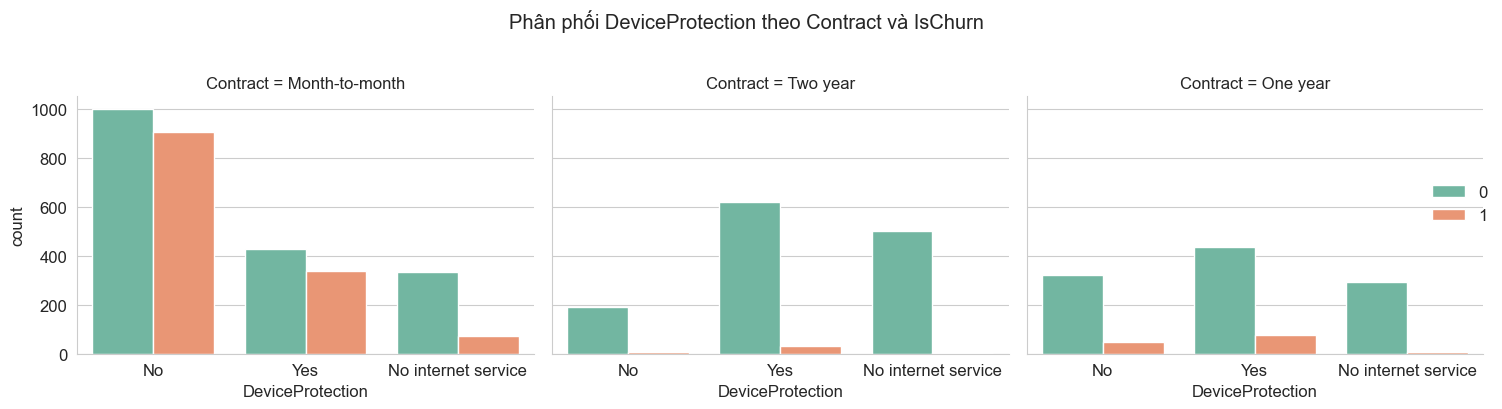

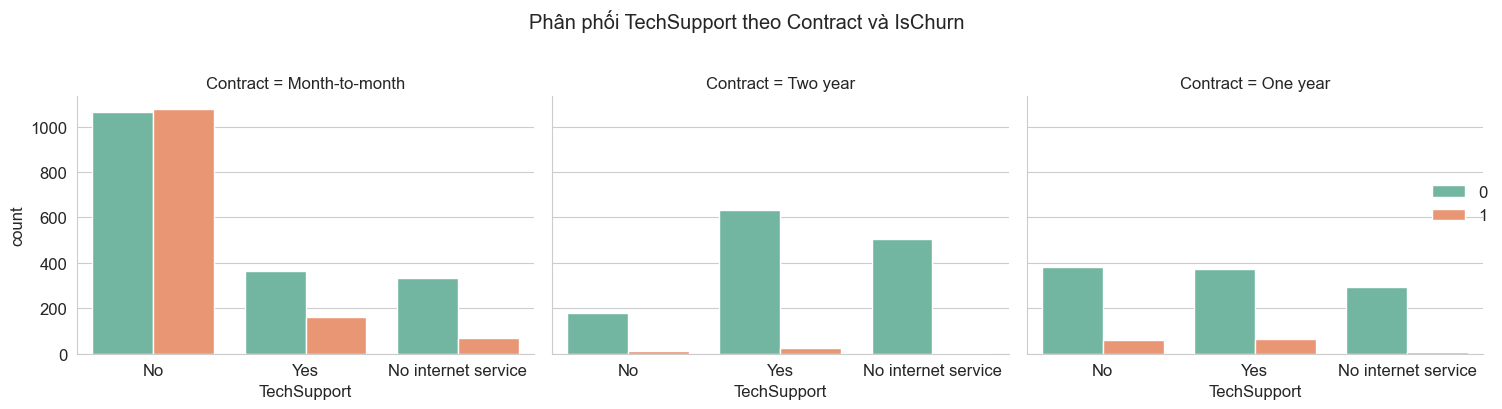

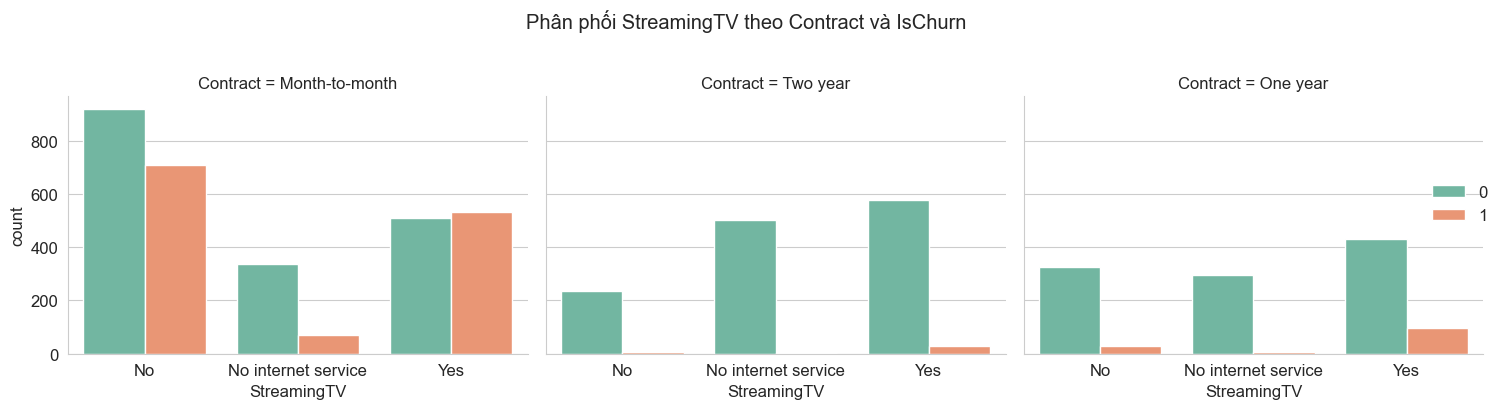

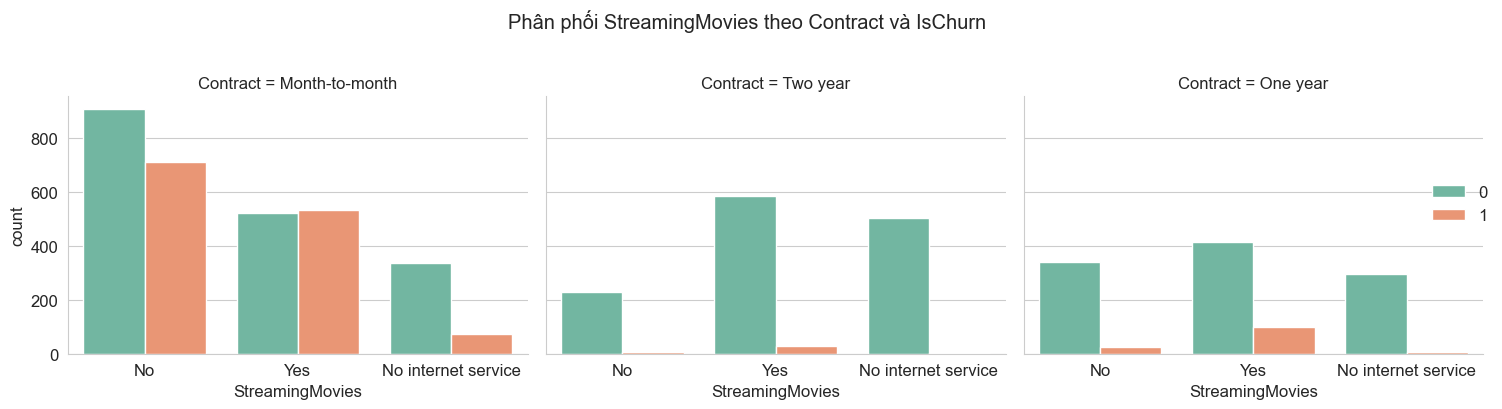

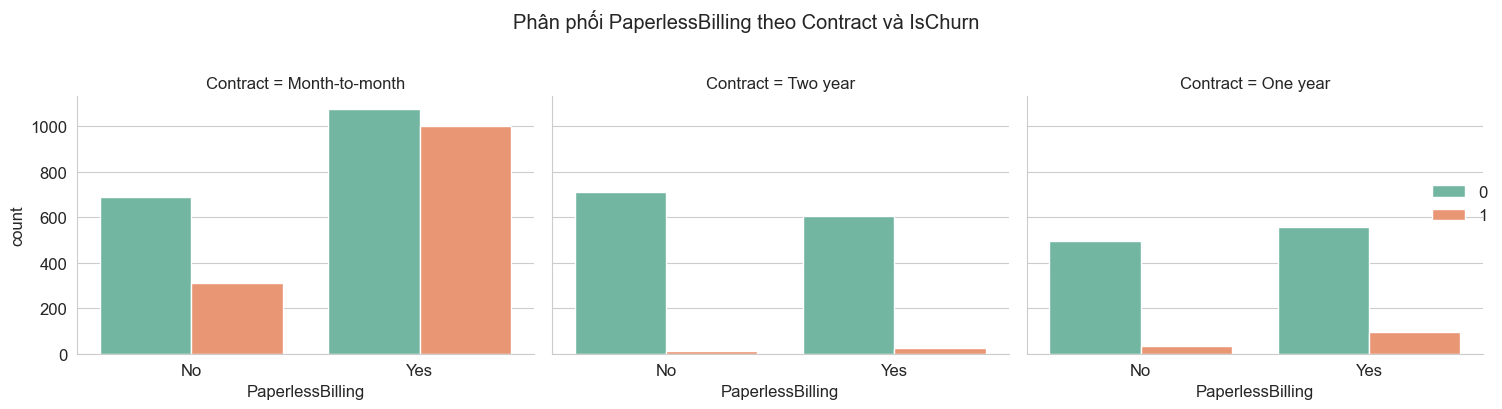

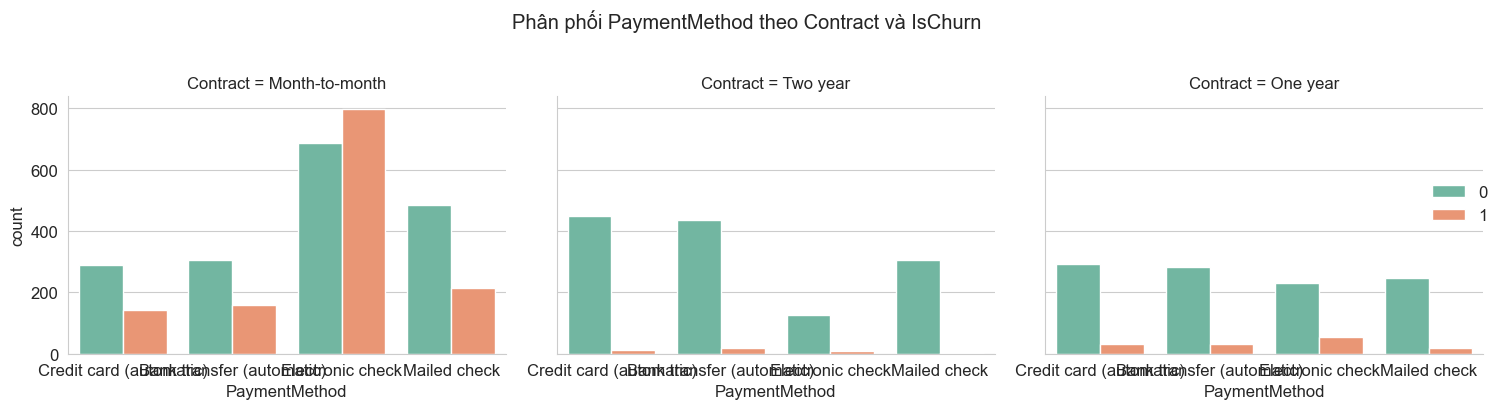

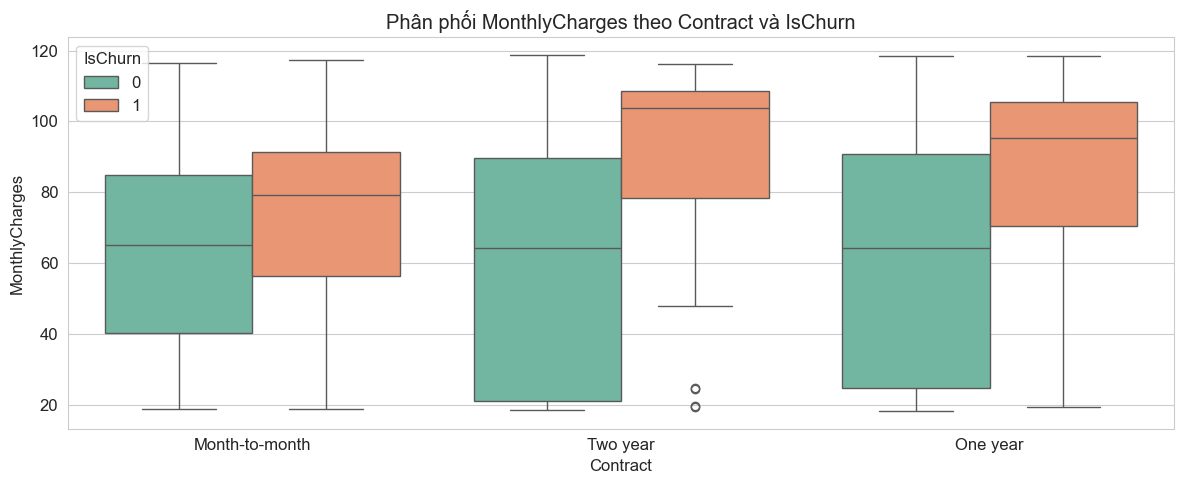

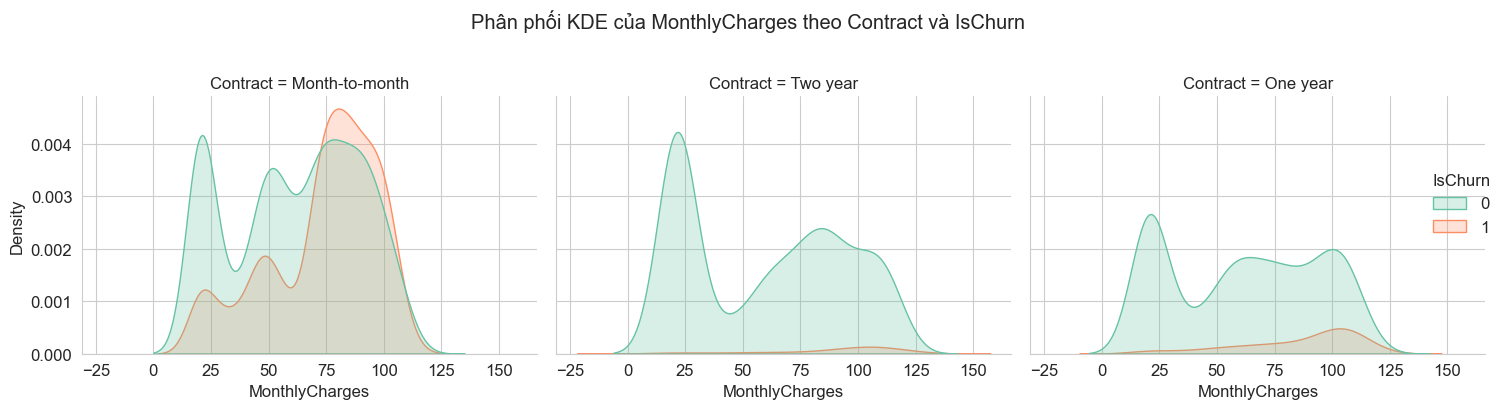

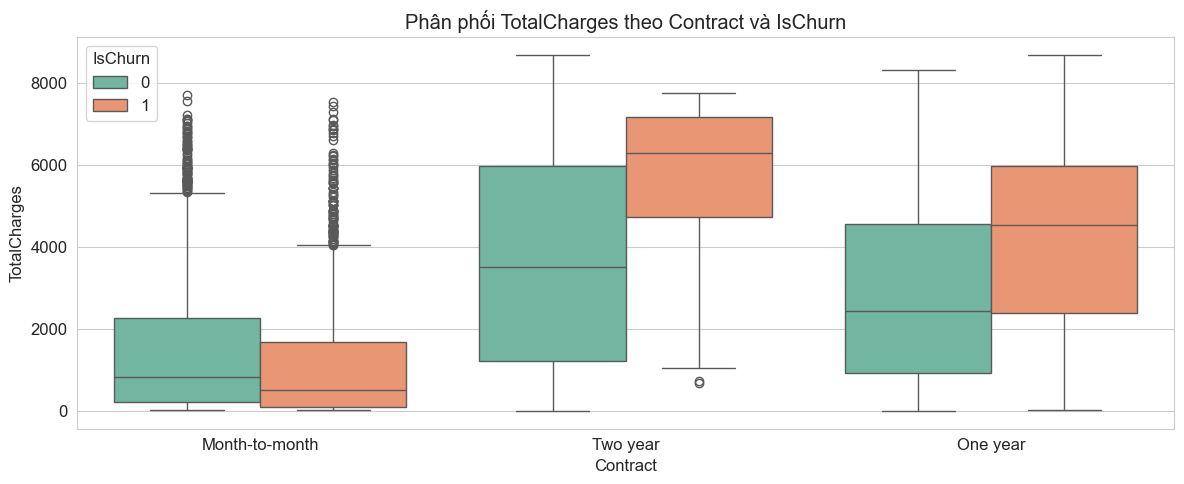

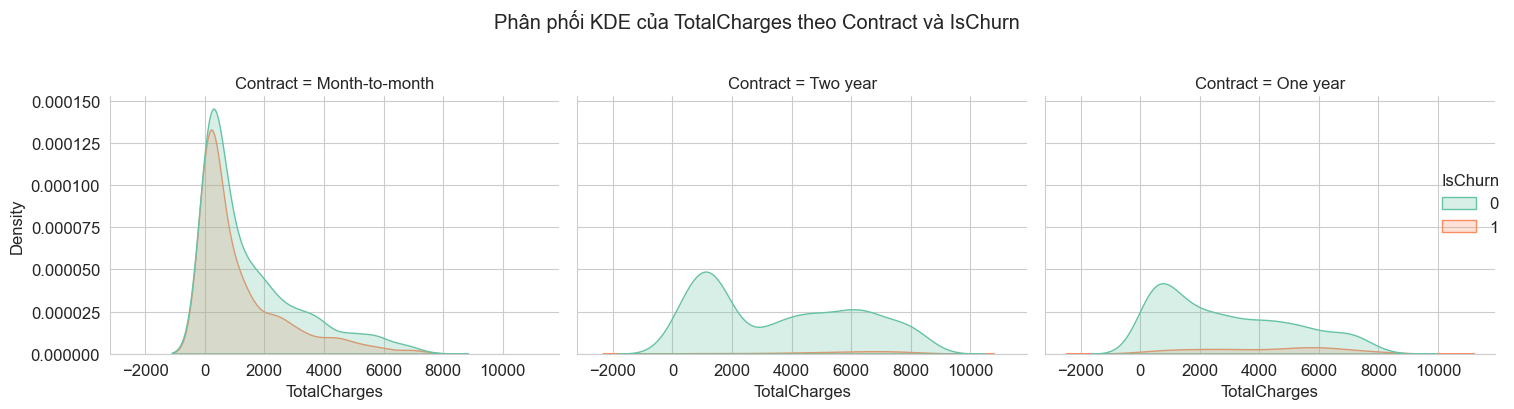

In [ ]:
# Ta cùng xem đặc điểm của month-to-month là gì nhé
for col in df_train.columns:
    if col not in ["IsChurn", "Contract"]:
        if df_train[col].dtype == "object" or df_train[col].nunique() <= 3:
            # Biến categorical: dùng FacetGrid với countplot
            g = sns.FacetGrid(df_train, col="Contract", height=4, aspect=1.2)
            g.map_dataframe(sns.countplot, x=col, hue="IsChurn", palette="Set2")
            
            # Thêm chú thích số lượng trên đỉnh mỗi bar
            for ax in g.axes.flat:
                for container in ax.containers:
                    ax.bar_label(container, fmt='%d', padding=3)
            
            g.add_legend()
            g.fig.suptitle(f'Phân phối {col} theo Contract và IsChurn', y=1.02)
            plt.tight_layout()
            plt.show()
        else:
            # Biến numeric: dùng boxplot
            plt.figure(figsize=(12, 5))
            sns.boxplot(data=df_train, x="Contract", y=col, hue="IsChurn", palette="Set2")
            plt.title(f'Phân phối {col} theo Contract và IsChurn')
            plt.tight_layout()
            plt.show()
            
            # Thêm facet KDE để xem phân phối chi tiết
            g = sns.displot(data=df_train, x=col, col="Contract", hue="IsChurn", 
                           kind="kde", fill=True, height=4, aspect=1.2, palette="Set2")
            g.fig.suptitle(f'Phân phối KDE của {col} theo Contract và IsChurn', y=1.02)
            plt.tight_layout()
            plt.show()

**Insight**: Ta tập trung vào những đặc điểm nhận dạng nổi bật của Month-to-month
+ SeniorCetizen có 